In [17]:
from soview import *
import shutil
import os
import gc
import pandas as pd

In [2]:
1+1


2

In [15]:
biotech_list = ['ST','Visium','Slide-seq','Slide-seqV2','HDST','Stereo-seq','seq-scope','osmFISH','seqFISH','MERFISH','seqFISH+','STARmap','EASI-FISH','sciSpace',
               'MIBI','CODEX','IMC','t-CyCIF','4i','3D-IMC',
                'SIMS','MALDI','DESI',
                'Slide-DNA-seq',
                'DBiT-seq','DSP'
               ]
biotech_molecule = ['mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA','mRNA',
                    'protein','protein','protein','protein','protein','protein',
                    'metabolite','metabolite','metabolite',
                    'DNA',
                    'mRNA_protein','mRNA_protein'
                   ]
biotech_res = ['sup','sup','cell','cell','sub','sub','sub','molecule','molecule','molecule','molecule','molecule','molecule','sub',
              'sub','sub','sub','sub','sub','sub',
               'sub','sup','sup',
               'cell',
               'sup','sup'
              ]
biotech_featurenum = [4,4,4,4,4,4,4,1,2,2,4,2,1,4,
                      1,1,1,1,1,1,
                      2,3,3,
                      4,
                      4,4
    
]
res_score_dict = {
    'sup':0.25,
    'cell':0.5,
    'sub':0.75,
    'molecule':1
}
molecule_list = ['mRNA','protein','metabolite','DNA']


In [61]:
pd_dict = {
    'biotech':[],
    'molecule':[],
    'biotech_res':[],
    'biotech_featurenum':[]
}
for i in range(len(biotech_list)):
    for j in range(len(molecule_list)):
        if biotech_molecule[i]=='mRNA_protein':
            if molecule_list[j]=='mRNA':
                pd_dict['biotech'].append(biotech_list[i])
                pd_dict['molecule'].append(molecule_list[j])
                pd_dict['biotech_res'].append(res_score_dict[biotech_res[i]])
                pd_dict['biotech_featurenum'].append(4)
            elif molecule_list[j]=='protein':
                pd_dict['biotech'].append(biotech_list[i])
                pd_dict['molecule'].append(molecule_list[j])
                pd_dict['biotech_res'].append(res_score_dict[biotech_res[i]])
                pd_dict['biotech_featurenum'].append(1)
        else:
            is_match_biotech_molecule = 1 if biotech_molecule[i]==molecule_list[j] else 0

            res = biotech_res[i]
            featurenum = biotech_featurenum[i]
            pd_dict['biotech'].append(biotech_list[i])
            pd_dict['molecule'].append(molecule_list[j])


            pd_dict['biotech_res'].append(res_score_dict[biotech_res[i]]*is_match_biotech_molecule)
            pd_dict['biotech_featurenum'].append(biotech_featurenum[i])
        
        
        

In [62]:
pd_df = pd.DataFrame(pd_dict)

In [65]:
541752/2

270876.0

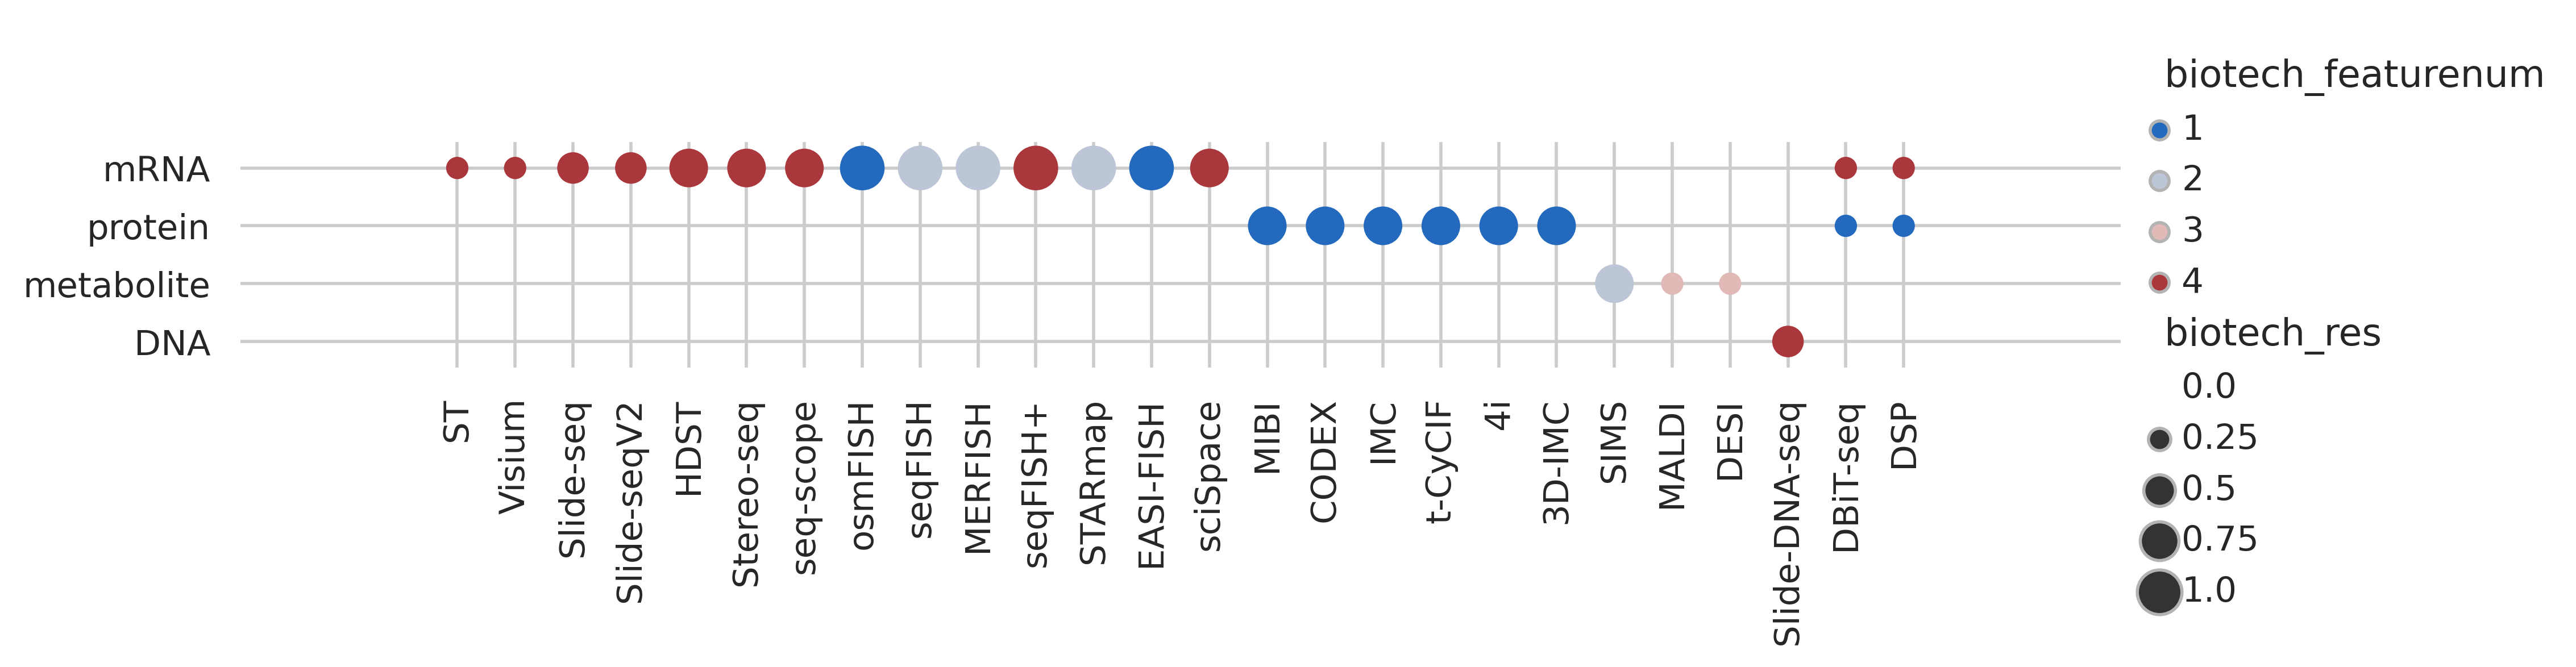

In [64]:
sns.set_theme(style="whitegrid")


g = sns.relplot(
    data=pd_df,
    x="biotech", y="molecule", hue="biotech_featurenum", size="biotech_res",
    palette="vlag", 
    # hue_norm=(-1, 1), 
    edgecolor=".7",
    height=10, 
    # sizes=(50, 250), 
    sizes={
        0:0,
        0.25:50,
        0.5:100,
        0.75:150,
        1:200
    },
    # size_norm=(-.2, .8),
    size_norm=(0,1),
    row_order=['DNA','mRNA','protein','metabolite']
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
# g.ax.margins(.02)
g.ax.margins(.15)


for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")